# Complete Link Clustering Analysis
This notebook performs hierarchical clustering using the Complete Linkage method on two datasets:
- `car.csv`
- `customer.csv`

We will evaluate the clustering results using multiple validation techniques and visualize the clusters.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from src.prep import Prep  # Import the Prep class from the provided prep.py file

## Data Preprocessing
We use the provided `prep.py` script to prepare the datasets.

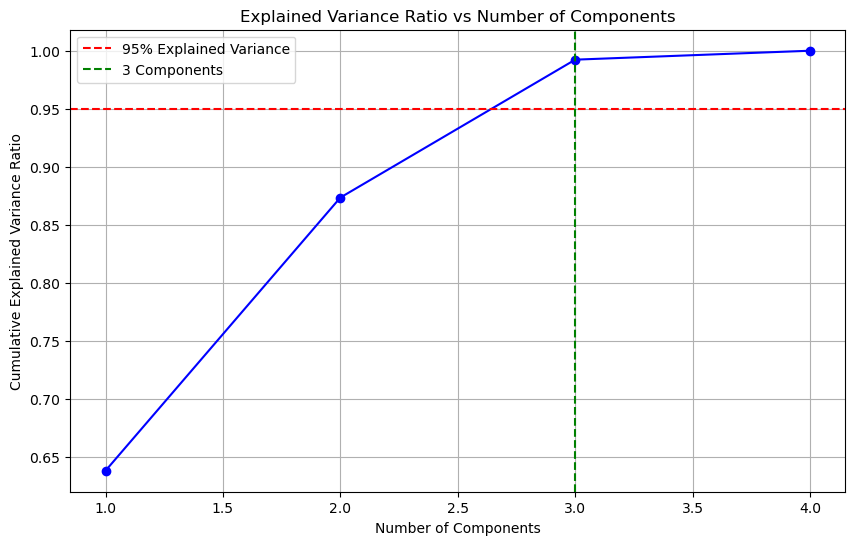

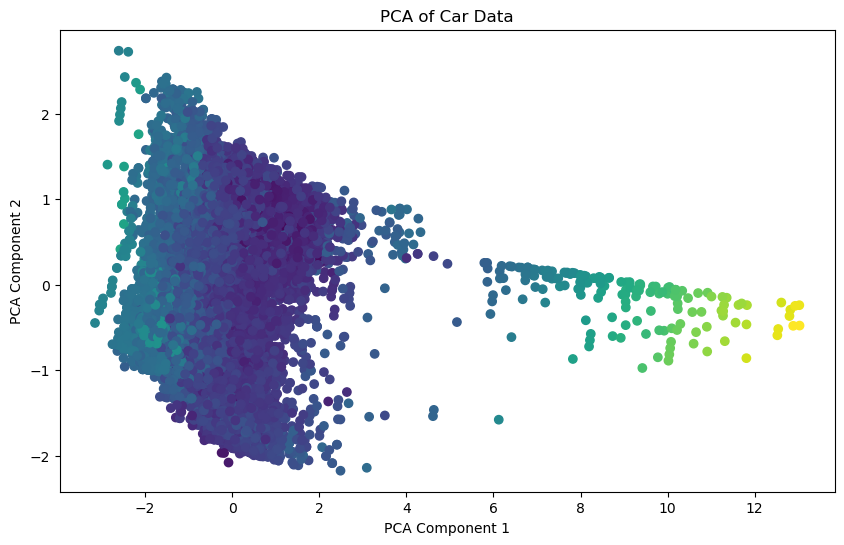

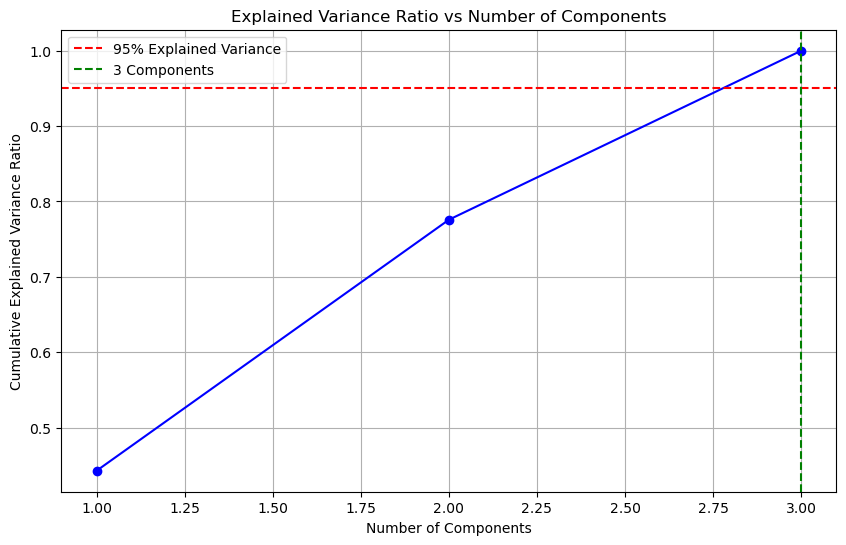

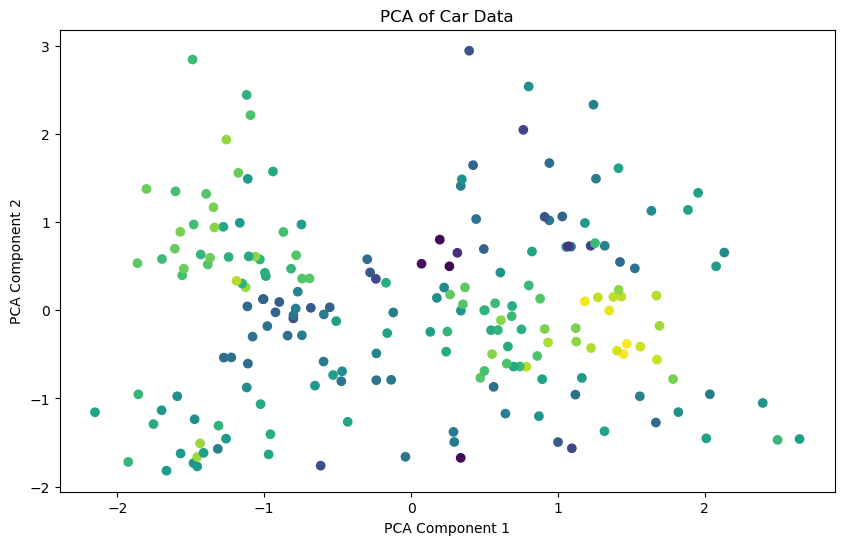

In [55]:
# Initialize the Prep class to load and preprocess the data
prep = Prep(car_data_path="data/car.csv", customer_data_path="data/customer.csv", output_pca=True)

# Get the preprocessed car and customer data
car_data = prep.prep_car
customer_data = prep.prep_customer

## Complete Link Clustering
We visualize the hierarchical clustering structure using a dendrogram.

## Car Data

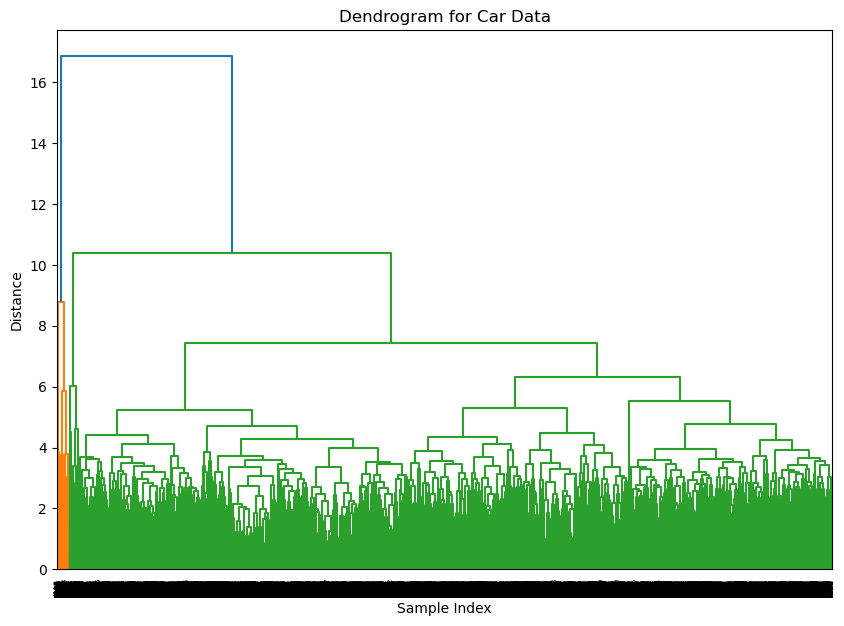

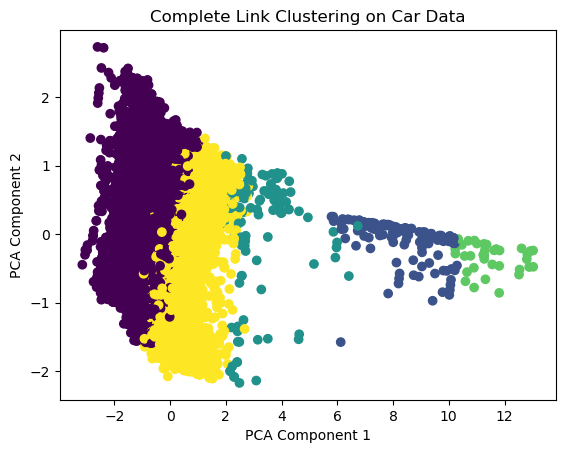

In [56]:
# Perform Complete Link Clustering on Car Data
car_linkage = linkage(car_data, method='complete')

# Plot Dendrogram for Car Data
plt.figure(figsize=(10, 7))
dendrogram(car_linkage)
plt.title('Dendrogram for Car Data')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Perform Agglomerative Clustering with Complete Linkage
car_cluster = AgglomerativeClustering(n_clusters=5, linkage='complete')
car_labels = car_cluster.fit_predict(car_data)

# Visualize Clustering Results for Car Data
plt.scatter(car_data.iloc[:, 0], car_data.iloc[:, 1], c=car_labels, cmap='viridis')
plt.title('Complete Link Clustering on Car Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Customer

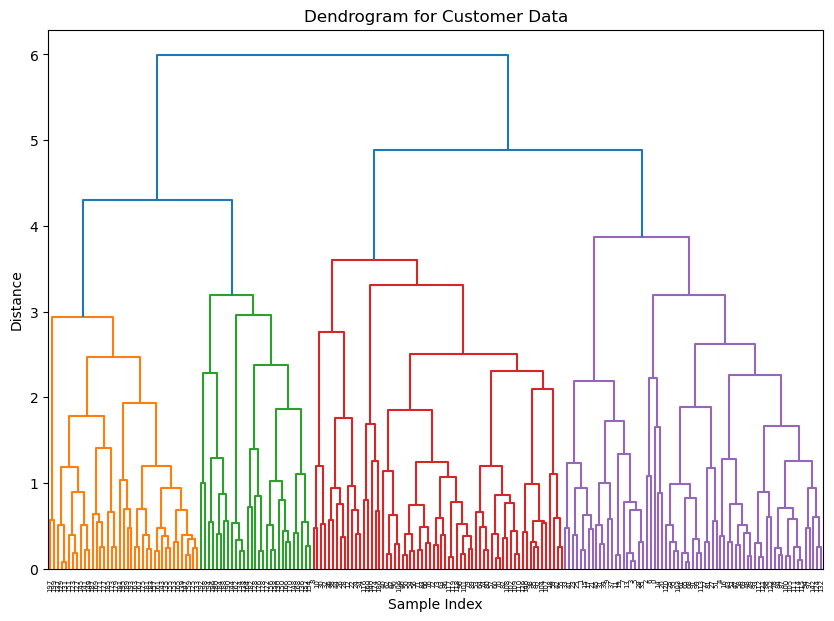

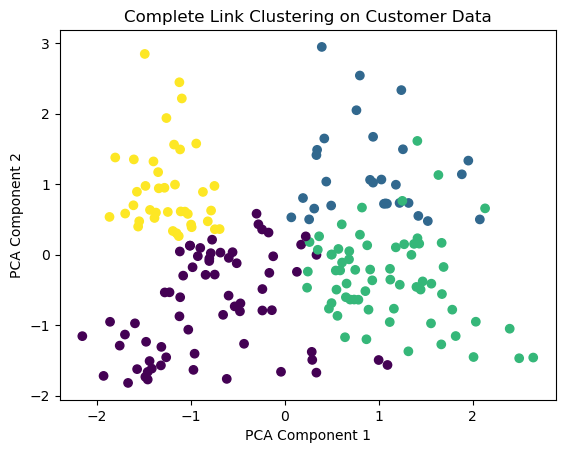

In [57]:
# Perform Complete Link Clustering on Customer Data
customer_linkage = linkage(customer_data, method='complete')

# Plot Dendrogram for Customer Data
plt.figure(figsize=(10, 7))
dendrogram(customer_linkage)
plt.title('Dendrogram for Customer Data')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Perform Agglomerative Clustering with Complete Linkage
customer_cluster = AgglomerativeClustering(n_clusters=4, linkage='complete')
customer_labels = customer_cluster.fit_predict(customer_data)

# Visualize Clustering Results for Customer Data
plt.scatter(customer_data.iloc[:, 0], customer_data.iloc[:, 1], c=customer_labels, cmap='viridis')
plt.title('Complete Link Clustering on Customer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Evaluation

In [58]:
# Silhouette Score for Car Data
car_silhouette = silhouette_score(car_data, car_labels)
print(f'Silhouette Score for Car Data: {car_silhouette}')

# Silhouette Score for Customer Data
customer_silhouette = silhouette_score(customer_data, customer_labels)
print(f'Silhouette Score for Customer Data: {customer_silhouette}')

Silhouette Score for Car Data: 0.1564283452878472
Silhouette Score for Customer Data: 0.30489182089590516


In [59]:
# Davies-Bouldin Index for Car Data
car_db = davies_bouldin_score(car_data, car_labels)
print(f'Davies-Bouldin Index for Car Data: {car_db}')

# Davies-Bouldin Index for Customer Data
customer_db = davies_bouldin_score(customer_data, customer_labels)
print(f'Davies-Bouldin Index for Customer Data: {customer_db}')

Davies-Bouldin Index for Car Data: 1.4528322906149735
Davies-Bouldin Index for Customer Data: 1.1671621383537083


In [60]:
# Calinski-Harabasz Index for Car Data
car_ch = calinski_harabasz_score(car_data, car_labels)
print(f'Calinski-Harabasz Index for Car Data: {car_ch}')

# Calinski-Harabasz Index for Customer Data
customer_ch = calinski_harabasz_score(customer_data, customer_labels)
print(f'Calinski-Harabasz Index for Customer Data: {customer_ch}')

Calinski-Harabasz Index for Car Data: 1373.5239752571601
Calinski-Harabasz Index for Customer Data: 80.35311694797396


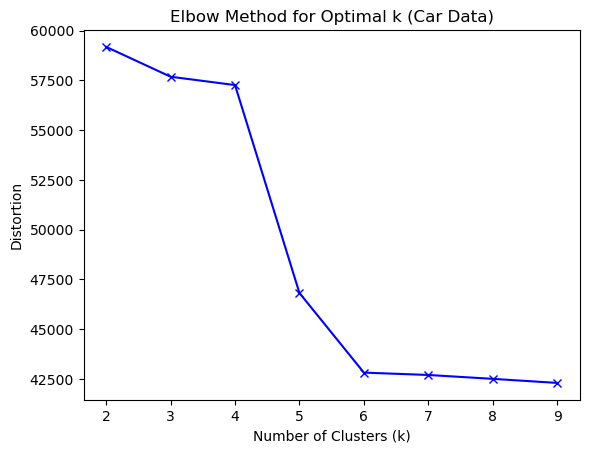

In [61]:
from scipy.spatial.distance import cdist

# Function to calculate distortion for AgglomerativeClustering
def calculate_distortion(data, labels):
    distortion = 0
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)  # Calculate centroid of the cluster
            distortion += np.sum(cdist(cluster_points, [centroid], 'euclidean') ** 2)
    return distortion

# Elbow Method for Car Data
distortions = []
K = range(2, 10)  # Start from 2 clusters, as silhouette score requires at least 2 clusters
for k in K:
    model = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = model.fit_predict(car_data)
    distortion = calculate_distortion(car_data, labels)
    distortions.append(distortion)

# Plot the Elbow Method for Car Data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k (Car Data)')
plt.show()

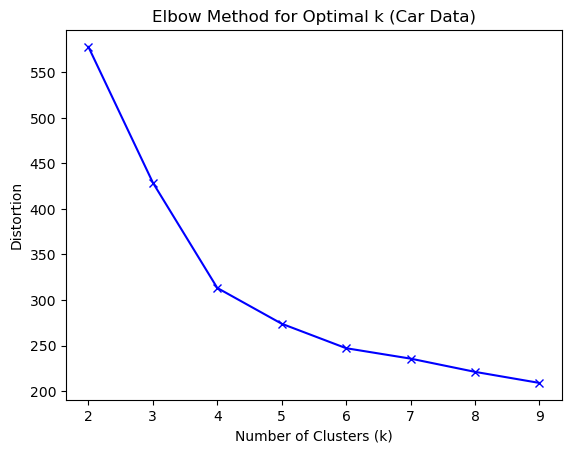

In [62]:
# Elbow Method for Customer Data
distortions = []
K = range(2, 10)  # Start from 2 clusters, as silhouette score requires at least 2 clusters
for k in K:
    model = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = model.fit_predict(customer_data)
    distortion = calculate_distortion(customer_data, labels)
    distortions.append(distortion)

# Plot the Elbow Method for Customer Data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k (Car Data)')
plt.show()